In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def gaussian_pdf(x, mu=0, sigma=1):
        u = (x - mu) / abs(sigma)
        y = (1 / (np.sqrt(2 * np.pi) * abs(sigma)))
        return y * np.exp(-0.5 * u**2)

In [4]:
def uniform_pdf(x):
    return 1 * ((x >= 0) & (x <= 1))

In [5]:
def kernel_smoothed_density(x_values, samples, width=0.3, kernel_function=gaussian_pdf):
    # Generate an array of kernel values centred on the samples
    kernel_values = [kernel_function(x_value, samples, width) for x_value in x_values]
    return np.average(kernel_values, axis=1)

In [6]:
# General global variables
ax1_color = 'steelblue'
ax2_color = 'firebrick'

### Section 1: Uniform and normal random variables

In [7]:
X_gaussian = np.random.randn(10000)
X_uniform = np.random.rand(10000)

Histograms of random samples compared with true pdf

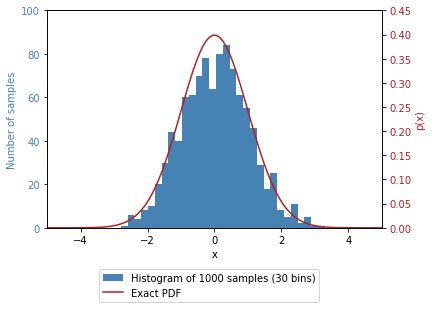

In [144]:
fig, ax1 = plt.subplots()

ax1.hist(X_gaussian[:1000], bins=30, color=ax1_color, label='Histogram of 1000 samples (30 bins)')
ax1.set_xlabel('x')
ax1.set_ylabel('Number of samples', color=ax1_color)
ax1.tick_params(axis='y', labelcolor=ax1_color)
ax1.set_ylim(0, 100)


ax2 = ax1.twinx()
x = np.linspace(-5, 5, 100)
ax2.plot(x, gaussian_pdf(x), color=ax2_color, label='Exact PDF')
ax2.set_ylabel('p(x)', color=ax2_color)
ax2.tick_params(axis='y', labelcolor=ax2_color)
ax2.set_ylim(0, 0.45)
ax2.set_xlim(-5, 5)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0))

plt.savefig('figures/gaussian_histogram_and_pdf.png', bbox_inches='tight')

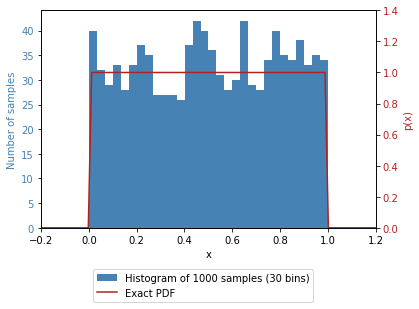

In [143]:
fig, ax1 = plt.subplots()

x = np.linspace(-0.2, 1.2, 100)

ax1.hist(X_uniform[:1000], bins=30, color=ax1_color, label='Histogram of 1000 samples (30 bins)')
ax1.set_xlabel('x')
ax1.set_ylabel('Number of samples', color=ax1_color)
ax1.tick_params(axis='y', labelcolor=ax1_color)

ax2 = ax1.twinx()
ax2.plot(x, uniform_pdf(x), color=ax2_color, label='Exact PDF')
ax2.set_ylabel('p(x)', color=ax2_color)
ax2.tick_params(axis='y', labelcolor=ax2_color)
ax2.set_ylim(0, 1.4)
ax2.set_xlim(-0.2, 1.2)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0))

plt.savefig('figures/uniform_histogram_and_pdf.png', bbox_inches='tight')

Kernel smoothing of random samples compared with true pdf

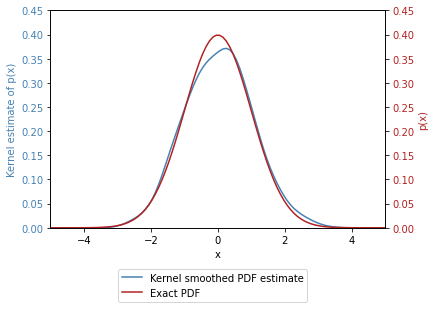

In [146]:
fig, ax1 = plt.subplots()

x = np.linspace(-5, 5, 100)

ax1.plot(x, kernel_smoothed_density(x, X_gaussian[:1000]), color=ax1_color, label='Kernel smoothed PDF estimate')
ax1.set_xlabel('x')
ax1.set_ylabel('Kernel estimate of p(x)', color=ax1_color)
ax1.tick_params(axis='y', labelcolor=ax1_color)
ax1.set_ylim(0, 0.45)

ax2 = ax1.twinx()
ax2.plot(x, gaussian_pdf(x), color=ax2_color, label='Exact PDF')
ax2.set_ylabel('p(x)', color=ax2_color)
ax2.tick_params(axis='y', labelcolor=ax2_color)
ax2.set_ylim(0, 0.45)
ax2.set_xlim(-5, 5)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0))
plt.savefig('figures/gaussian_kernel_smoothed.png', bbox_inches='tight')

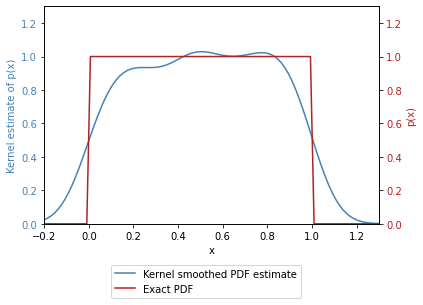

In [147]:
fig, ax1 = plt.subplots()

x = np.linspace(-0.3, 1.3, 100)

ax1.plot(x, kernel_smoothed_density(x, X_uniform[:1000], width=0.1), color=ax1_color, label='Kernel smoothed PDF estimate')
ax1.set_xlabel('x')
ax1.set_ylabel('Kernel estimate of p(x)', color=ax1_color)
ax1.tick_params(axis='y', labelcolor=ax1_color)
ax1.set_ylim(0, 1.3)


ax2 = ax1.twinx()
ax2.plot(x, uniform_pdf(x), color=ax2_color, label='Exact PDF')
ax2.set_ylabel('p(x)', color=ax2_color)
ax2.tick_params(axis='y', labelcolor=ax2_color)
ax2.set_ylim(0, 1.3)
ax2.set_xlim(-0.2, 1.3)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0))
plt.savefig('figures/uniform_kernel_smoothed.png', bbox_inches='tight')

In [12]:
def plot_uniform_histogram_mean_sd(N):
    plt.figure()
    plt.hist(X_uniform[:N], bins=30, color=ax1_color)
    ax1.set_xlabel('x')
    ax1.set_ylabel('Number of samples')
    ax1.tick_params(axis='y')
